In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import joblib


In [4]:
# Load the dataset
df_cleaned = pd.read_csv('/content/drug_consumption_cleaned.csv')

In [5]:
# Reviewing of CORRELATION Matrix this Column has low correlation with strong drugs.

low_corr = ['Age', 'Gender', 'Education','Ascore']
for column in low_corr:
    df_cleaned = df_cleaned.drop(column, axis=1)
df_cleaned.head()

,ID,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Alcohol,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,5,3,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2,5,6,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,5.0,...,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,3,5,6,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5,6,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,4.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5,5,6,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


CLASSIFICATION AND PREDICTION USING HEROIN DRUG

In [6]:
# Define 'Heroin' usage as the target variable
df_cleaned['Heroin'] = df_cleaned['Heroin'].apply(lambda x: 1 if x > 0 else 0)

# Define the feature matrix and target vector
X = df_cleaned.drop('Heroin', axis=1)  # Dropping the target variable from the features
y = df_cleaned['Heroin']

# Split the data into training and testing sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Traditional ML models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Ridge Classifier': RidgeClassifier(),
    'Support Vector Machines': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}


In [7]:
def train_and_evaluate_ml_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
    print('ACCURACY')
    for name, model in models.items():
        yhat = model.predict(X_test)
        acc = accuracy_score(y_test, yhat)
        print(f'{name} Accuracy: {acc:.2%}')
        print('-------------------------------------------')
# Call the function to train and evaluate ML models
train_and_evaluate_ml_models(models, X_train, y_train, X_test, y_test)

# ANN model
def create_ann_model(input_dim):
    ann_model = Sequential()
    ann_model.add(Dense(units=16, activation='relu', input_dim=input_dim))
    ann_model.add(Dropout(0.1))
    ann_model.add(Dense(units=8, activation='relu'))
    ann_model.add(Dense(units=1, activation='sigmoid'))
    ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann_model
print('-------------------------------------------------')
# Deep Neural Network model
def create_deep_model(input_dim):
    deep_model = Sequential()
    deep_model.add(Dense(units=64, activation='relu', input_dim=input_dim))
    deep_model.add(Dropout(0.2))
    deep_model.add(Dense(units=32, activation='relu'))
    deep_model.add(Dropout(0.2))
    deep_model.add(Dense(units=16, activation='relu'))
    deep_model.add(Dense(units=1, activation='sigmoid'))
    deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return deep_model

# Train and evaluate neural network models

ann_model = create_ann_model(X_train_scaled.shape[1])
deep_model = create_deep_model(X_train_scaled.shape[1])

# Fit the models
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
deep_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'ANN Model Accuracy: {ann_accuracy:.2%}')
print('-------------------------------------------------')

# Evaluate the Deep Neural Network model
deep_loss, deep_accuracy = deep_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Deep Neural Network Model Accuracy: {deep_accuracy:.2%}')
print('-------------------------------------------------')



ACCURACY
Logistic Regression Accuracy: 88.30%
-------------------------------------------
Ridge Classifier Accuracy: 87.23%
-------------------------------------------
Support Vector Machines Accuracy: 85.37%
-------------------------------------------
Random Forest Classifier Accuracy: 89.10%
-------------------------------------------
K-Nearest Neighbors Accuracy: 84.04%
-------------------------------------------
Gradient Boosting Classifier Accuracy: 88.56%
-------------------------------------------
Naive Bayes Accuracy: 82.98%
-------------------------------------------
Decision Tree Classifier Accuracy: 82.71%
-------------------------------------------
-------------------------------------------------
ANN Model Accuracy: 88.30%
-------------------------------------------------
Deep Neural Network Model Accuracy: 87.77%
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


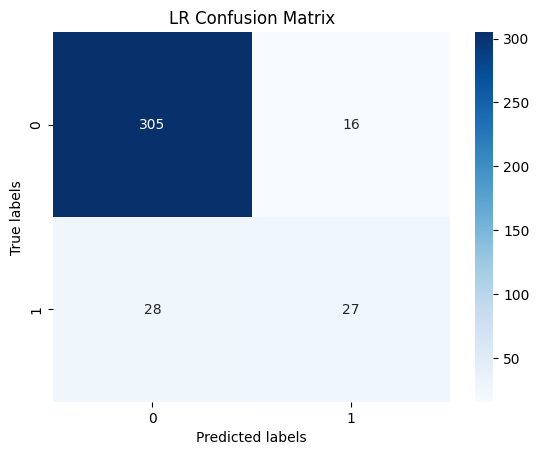

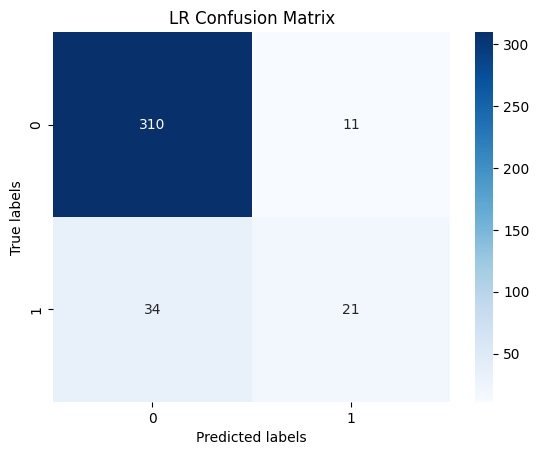

12/12 [==============================] - 0s 2ms/step


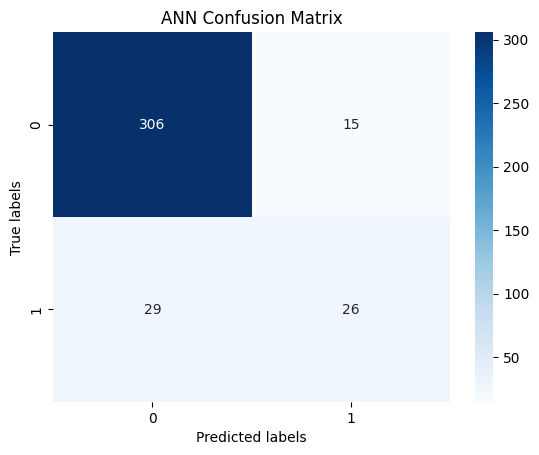

12/12 [==============================] - 0s 2ms/step


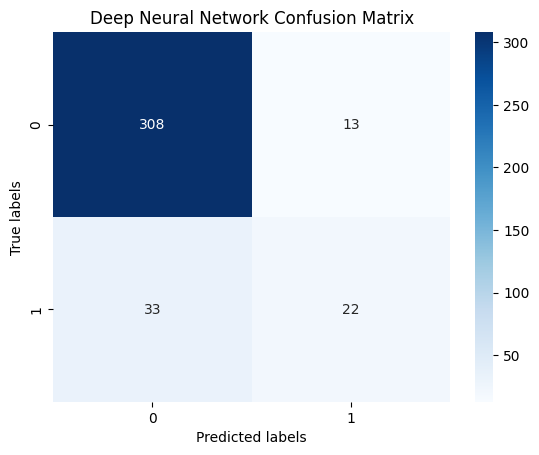

['DNN_model_heroin.h5']

In [9]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='LR Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

#Confusion Matrix of 2 Best Performing traditional Model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
yhat = LR_model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

joblib.dump(LR_model, 'LR_model_heroin.pkl')

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
yhat = RF_model.predict(X_test)
plot_confusion_matrix(y_test, yhat)


# Predictions with ANN model
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_ann, title='ANN Confusion Matrix')

joblib.dump(LR_model, 'ANN_model_heroin_h5')

# Predictions with Deep Neural Network model
y_pred_deep = (deep_model.predict(X_test_scaled) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_deep, title='Deep Neural Network Confusion Matrix')

joblib.dump(LR_model, 'DNN_model_heroin.h5')